<a href="https://colab.research.google.com/github/singhnidh/AgriGuard-A-Smart-Leaf-Disease-Detection-System-Leveraging-Attention-Mechanism-and-Ensemble-Learning/blob/main/ENSEMBLE_LEARNING_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from google.colab import drive
drive.mount('/content/drive')
# Load the trained models
resnet_model_path = "/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/model_0.1_resnet.h5"
InceptionnetV3_model_path = "/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/model_2_inception.h5"
Vggnet_model_path="/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/vgg.h5"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**RESNET MODEL DETAILS**

In [ ]:
import os
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, concatenate, Activation, multiply, Dropout, Flatten
from keras.optimizers import Adam
!pip install livelossplot
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path
import numpy as np
from livelossplot.inputs.keras import PlotLossesCallback
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
BATCH_SIZE = 64
input_shape = (224, 224, 3)
n_classes = 20

#------------------------------------------>>>>>>>  Data generators <<<<<<<<<<-------------------------------------#

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.15)

test_generator = ImageDataGenerator()

download_dir = '/content/drive/MyDrive/VIT_MT_PROJECT__2/DATASET'
train_data_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data'
test_data_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data'

class_subset = os.listdir('/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data')

traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

from tensorflow.keras.models import load_model
# Load the model
model_1_RESNET50 = load_model('/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/model_0.1_resnet.h5')
# Load test data and generate predictions
resnet_predictions = model_1_RESNET50.predict(testgen, verbose=1)

Found 20508 images belonging to 20 classes.
Found 3608 images belonging to 20 classes.
Found 5806 images belonging to 20 classes.
5806/5806 [==============================] - 534s 92ms/step


In [ ]:
resnet_class_labels = np.argmax(resnet_predictions, axis=1)
# True labels
true_labels = testgen.classes
# Calculate accuracy
resnet_accuracy = accuracy_score(true_labels, resnet_class_labels)
print("\nResNet50 Accuracy:", resnet_accuracy)


ResNet50 Accuracy: 0.851877368239752


#**INCEPTIONNET V3 MODEL DETAILS**

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, multiply, Activation, concatenate, Reshape
from keras.optimizers import Adam
import os
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Attention
from keras.optimizers import Adam
!pip install livelossplot
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
from livelossplot.inputs.keras import PlotLossesCallback
plot_loss_1 = PlotLossesCallback()
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, concatenate, Activation, multiply, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
BATCH_SIZE = 64
input_shape = (224, 224, 3)
n_classes = 20

#------------------------------------------>>>>>>>  Data generators <<<<<<<<<<-------------------------------------#

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input)  # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)  # VGG16 preprocessing
download_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET'

train_data_dir ='/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data'
test_data_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data'

class_subset = os.listdir('/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data')


traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

from keras.models import load_model
import numpy as np
Inception_model = load_model('/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/model_2_inception.h5')#------------------------------------------->>>>>>>Calculate model test accuracy <<<<<<<<<<----------------------------#
#------------------------------------------->>>>>>>Testing and Evaluation<<<<<<<<<<------------------------------------#
InceptionV3_predictions = Inception_model.predict(testgen)
InceptionV3_class_labels = np.argmax(InceptionV3_predictions, axis=1)
# True labels
true_labels = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v, k) for k, v in class_indices.items())
# Calculate accuracy
InceptionV3_accuracy = accuracy_score(true_labels, InceptionV3_class_labels)
print("INCEPTION Model Accuracy with Custom Attention Mechanism: {:.2f}%".format(InceptionV3_accuracy * 100))

Found 20508 images belonging to 20 classes.
Found 3608 images belonging to 20 classes.
Found 5806 images belonging to 20 classes.
5806/5806 [==============================] - 879s 150ms/step
INCEPTION Model Accuracy with Custom Attention Mechanism: 92.99%


#**VGGNET16 MODEL DETAILS**

In [ ]:
import os
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Attention
from keras.optimizers import Adam
!pip install livelossplot
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path
import numpy as np
from livelossplot.inputs.keras import PlotLossesCallback
plot_loss_1 = PlotLossesCallback()
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, concatenate, Activation, multiply, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
download_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET'
train_data_dir ='/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data'
test_data_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data'
BATCH_SIZE = 64
input_shape = (224, 224, 3)
n_classes = 20


#------------------------------------------>>>>>>>  Data generators <<<<<<<<<<-------------------------------------#

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input)  # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)  # VGG16 preprocessing
download_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET'

train_data_dir ='/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data'
test_data_dir = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data'

class_subset = os.listdir('/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/ Train_data')


traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

from tensorflow.keras.models import load_model
# Load the model
Vggnet_model= load_model('/content/drive/MyDrive/ VIT_MT_PROJECT__2/MODEL NOTEBOOK/Trained Model weight saved/vgg.h5')

Found 20508 images belonging to 20 classes.
Found 3608 images belonging to 20 classes.
Found 5806 images belonging to 20 classes.


In [ ]:
#------------------------------------------->>>>>>>Calculate model test accuracy <<<<<<<<<<----------------------------#
#------------------------------------------->>>>>>>Testing and Evaluation<<<<<<<<<<----------------------------#
Vggnet_predictions = Vggnet_model.predict(testgen)
vggnet_class_labels = np.argmax(Vggnet_predictions, axis=1)
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v, k) for k, v in class_indices.items())
vggnet_accuracy = accuracy_score(true_labels, vggnet_class_labels)
print("VGG16 Model Accuracy with Custom Attention Mechanism: {:.2f}%".format(vggnet_accuracy * 100))

5806/5806 [==============================] - 3040s 523ms/step
VGG16 Model Accuracy with Custom Attention Mechanism: 90.27%


# **Ensemble by averaging predictions**

In [ ]:
 # Ensemble by averaging predictions
ensemble_predictions = (resnet_predictions + InceptionV3_predictions + Vggnet_predictions) / 3
# Convert probabilities to class labels by taking argmax
resnet_class_labels = np.argmax(resnet_predictions, axis=1)
InceptionV3_class_labels = np.argmax(InceptionV3_predictions, axis=1)
vggnet_class_labels = np.argmax(Vggnet_predictions, axis=1)
ensemble_class_labels = np.argmax(ensemble_predictions, axis=1)

In [ ]:
# True labels
true_labels = testgen.classes
# Calculate accuracy
resnet_accuracy = accuracy_score(true_labels, resnet_class_labels)
InceptionV3_accuracy = accuracy_score(true_labels, InceptionV3_class_labels)
vggnet_accuracy = accuracy_score(true_labels, vggnet_class_labels)
ensemble_accuracy = accuracy_score(true_labels, ensemble_class_labels)
print("\nResNet50 Accuracy:", resnet_accuracy)
print("inception Accuracy:", InceptionV3_accuracy)
print("VggNet Accuracy:", vggnet_accuracy)
print("Ensemble Accuracy:", ensemble_accuracy)


ResNet50 Accuracy: 0.851877368239752
inception Accuracy: 0.929900103341371
VggNet Accuracy: 0.9026868756458836
Ensemble Accuracy: 0.9658973475714778


In [ ]:
# True labels
true_labels = testgen.classes
# Calculate accuracy
resnet_accuracy = accuracy_score(true_labels, resnet_class_labels)
InceptionV3_accuracy = accuracy_score(true_labels, InceptionV3_class_labels)
vggnet_accuracy = accuracy_score(true_labels, vggnet_class_labels)
ensemble_accuracy = accuracy_score(true_labels, ensemble_class_labels)
print("\nResNet50 Accuracy: {:.2f}%".format(resnet_accuracy * 100))
print("inception Accuracy: {:.2f}%".format(InceptionV3_accuracy * 100))
print("VggNet Accuracy: {:.2f}%".format( vggnet_accuracy * 100))
print("Ensemble Accuracy: {:.2f}%".format(ensemble_accuracy * 100))


ResNet50 Accuracy: 85.19%
inception Accuracy: 92.99%
VggNet Accuracy: 90.27%
Ensemble Accuracy: 96.59%


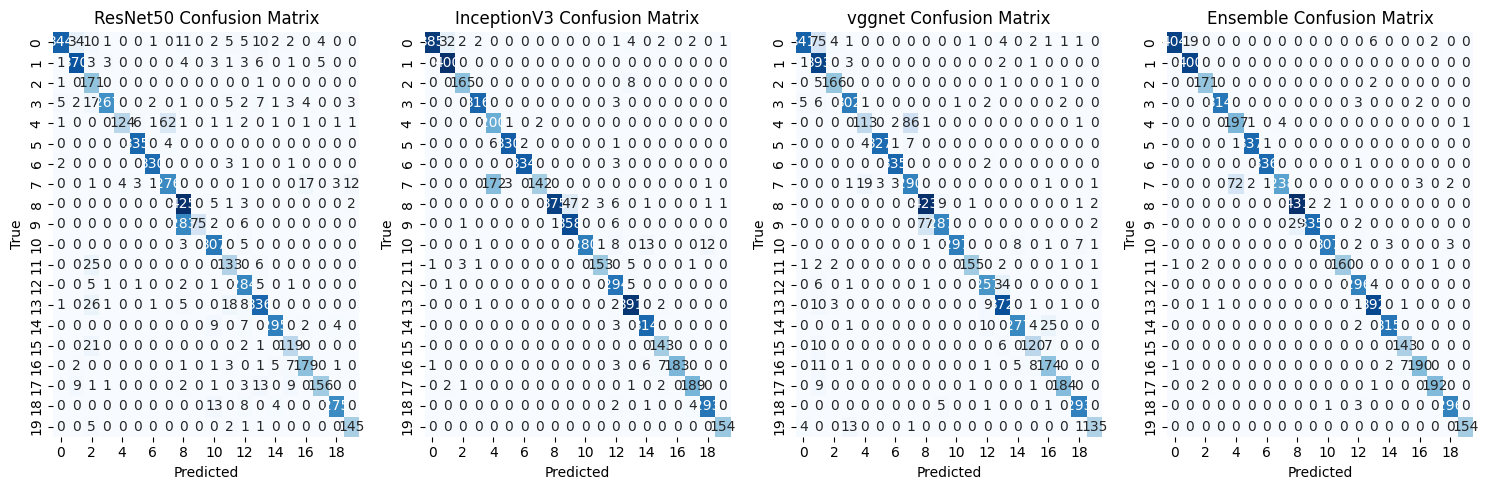

In [ ]:
# True labels
true_labels = testgen.classes

# Calculate confusion matrix
resnet_cm = confusion_matrix(true_labels, resnet_class_labels)
InceptionV3_cm = confusion_matrix(true_labels, InceptionV3_class_labels)
vggnet_cm = confusion_matrix(true_labels, vggnet_class_labels)
ensemble_cm = confusion_matrix(true_labels, ensemble_class_labels)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.heatmap(resnet_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 4, 2)
sns.heatmap(InceptionV3_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 4, 3)
sns.heatmap(vggnet_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('vggnet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 4, 4)
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()



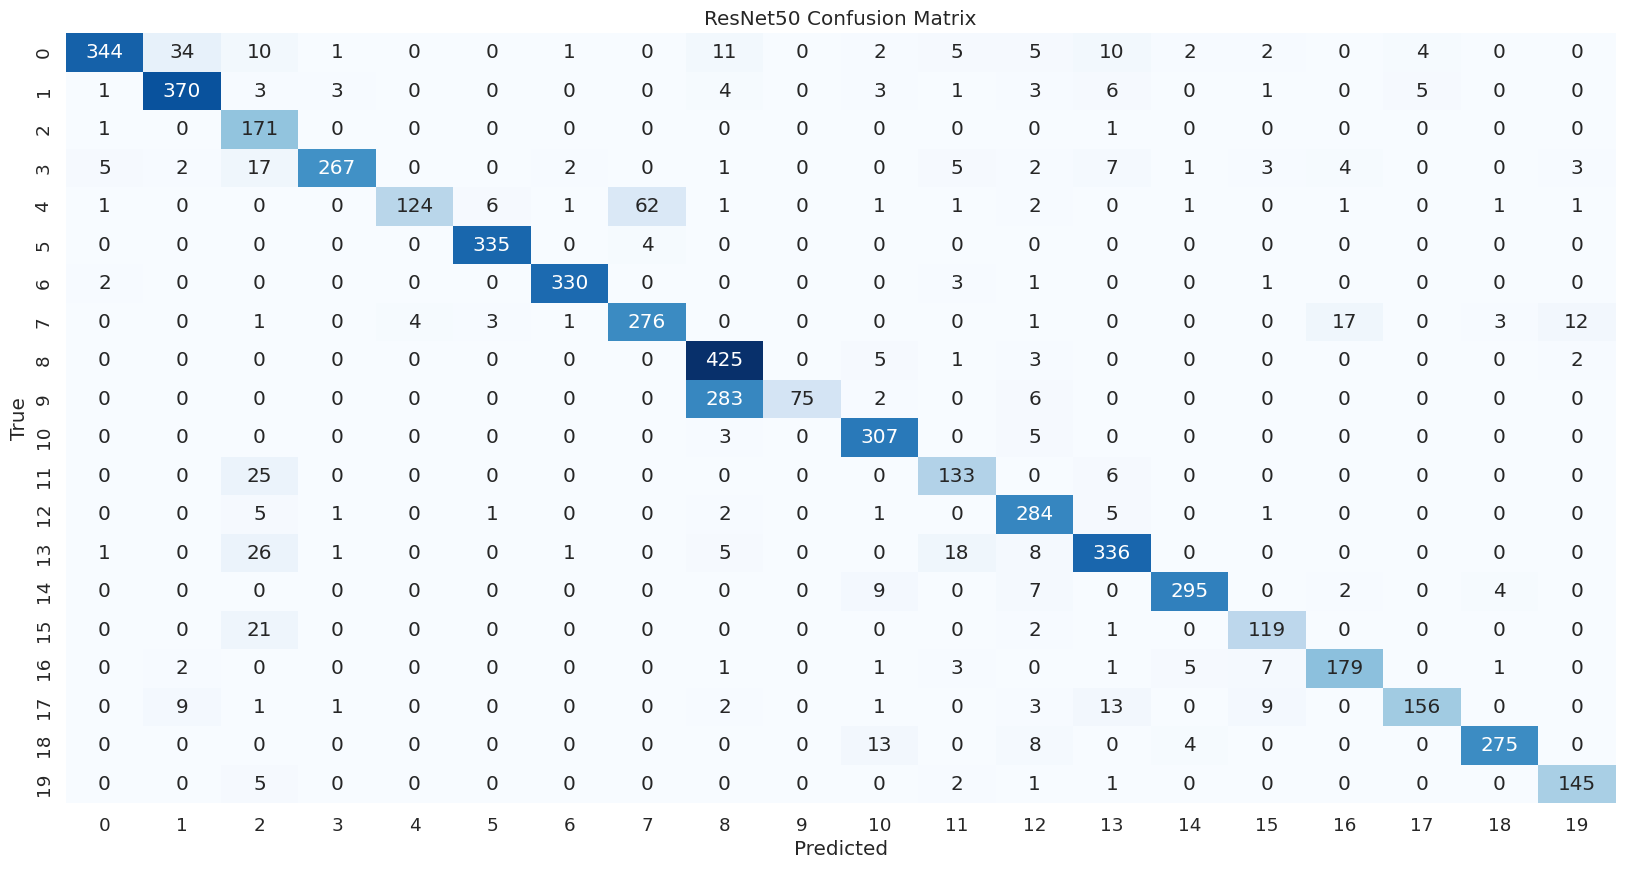

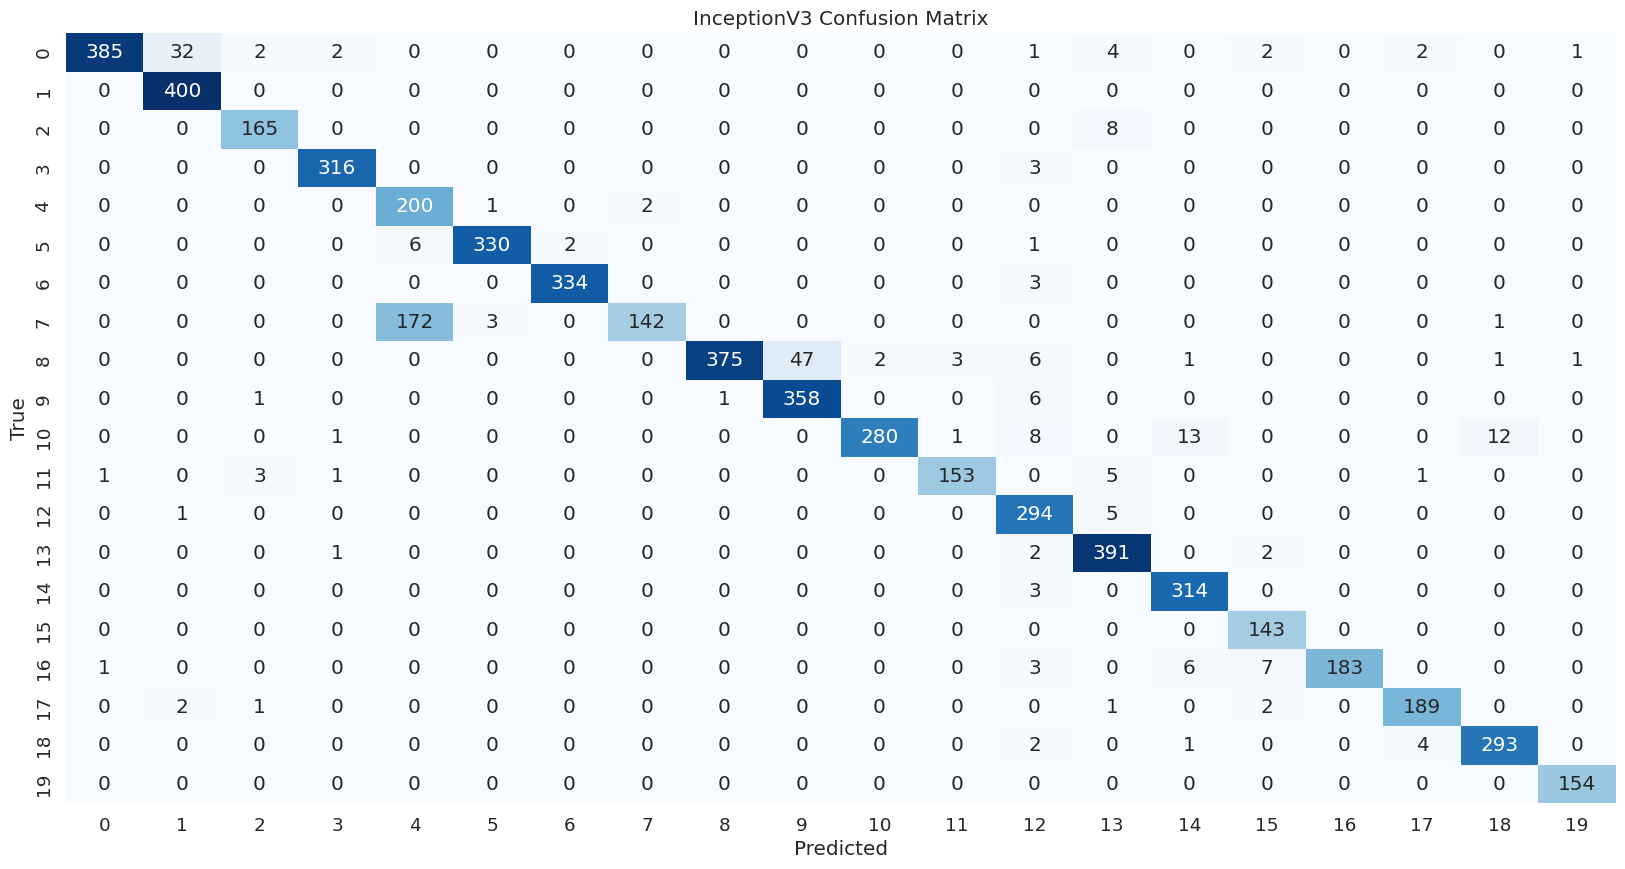

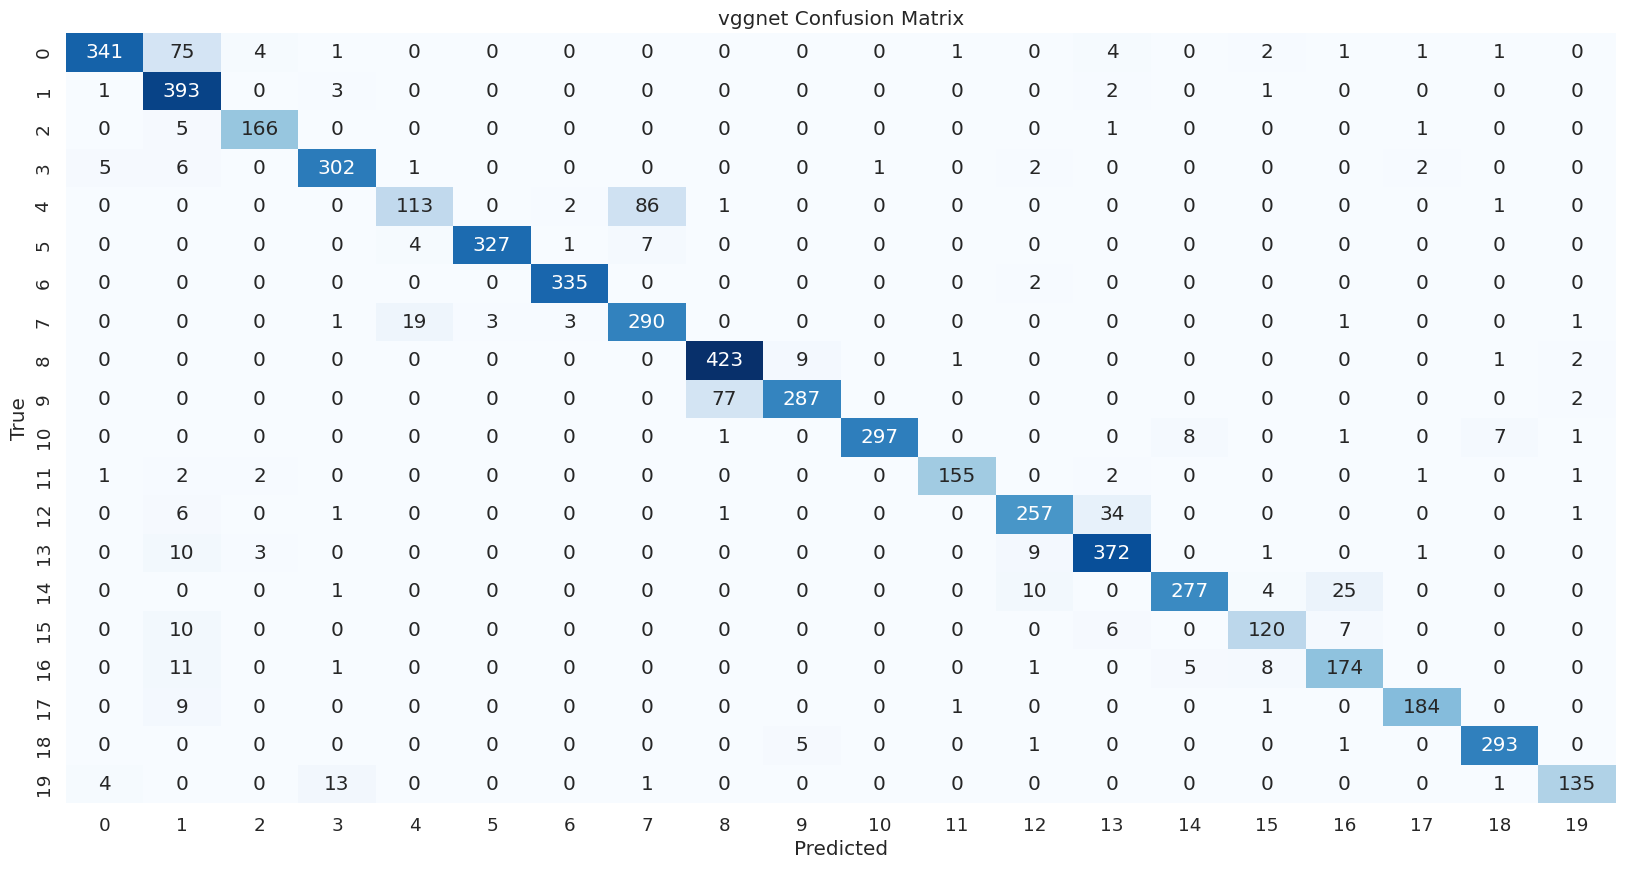

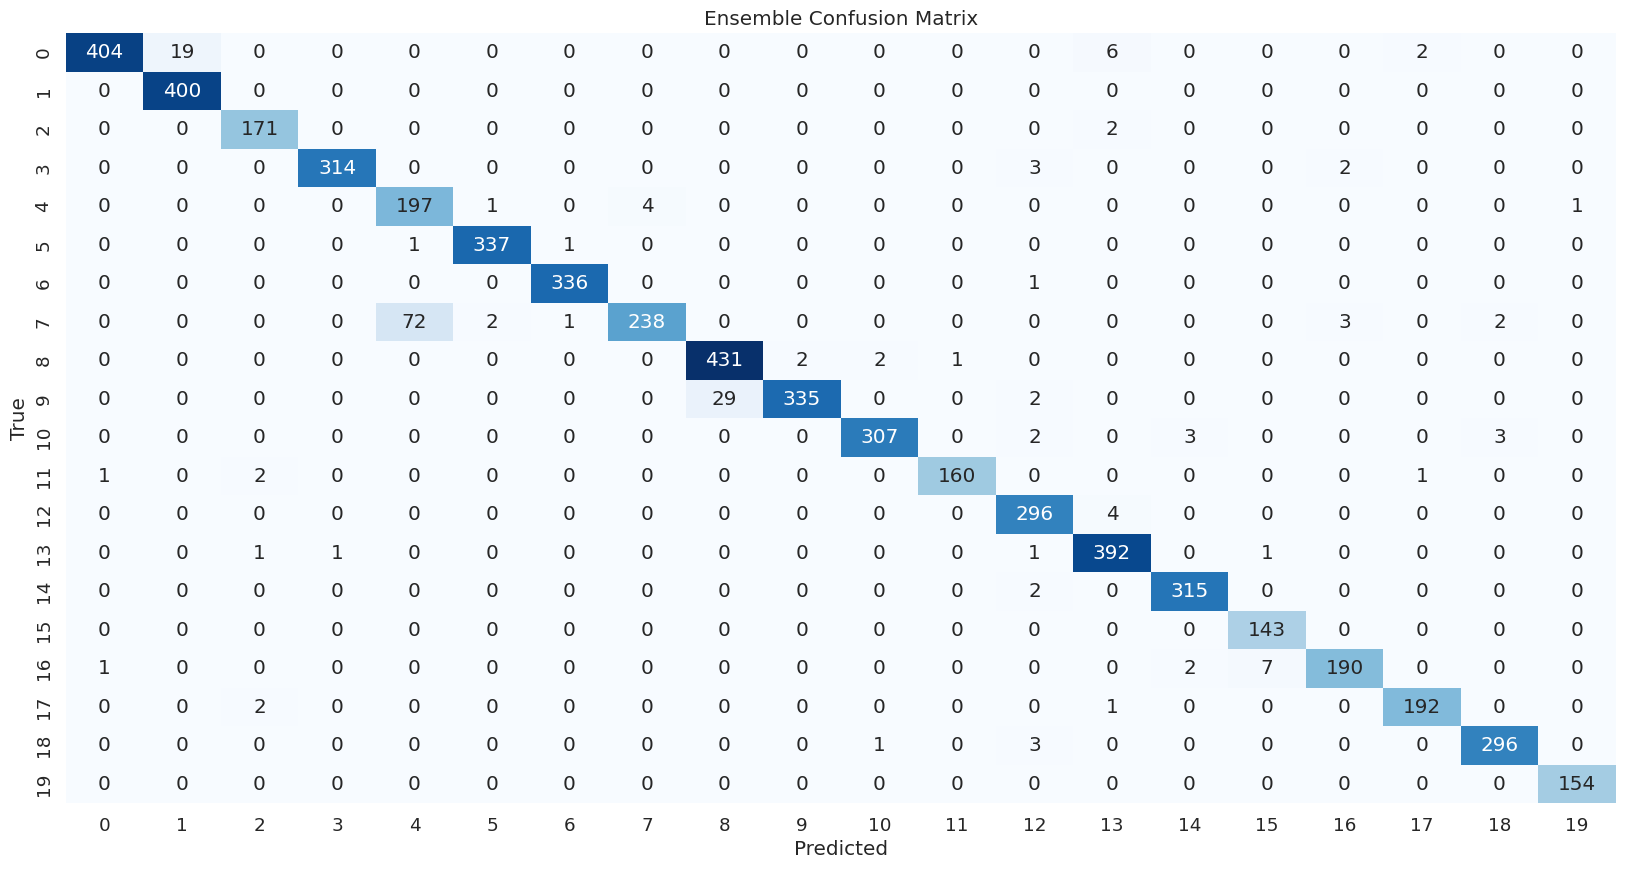

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# True labels
true_labels = testgen.classes

# Calculate confusion matrix
resnet_cm = confusion_matrix(true_labels, resnet_class_labels)
InceptionV3_cm = confusion_matrix(true_labels, InceptionV3_class_labels)
vggnet_cm = confusion_matrix(true_labels, vggnet_class_labels)
ensemble_cm = confusion_matrix(true_labels, ensemble_class_labels)

# Plot confusion matrices
#plt.figure(figsize=(15, 5))
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)

# ResNet50 Confusion Matrix
#plt.subplot(1, 4, 1)
sns.heatmap(resnet_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# InceptionV3 Confusion Matrix
#plt.figure(figsize=(15, 5))
#plt.subplot(1, 4, 2)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(InceptionV3_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# vggnet Confusion Matrix
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(vggnet_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('vggnet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Ensemble Confusion Matrix
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Calculate classification report
resnet_report = classification_report(true_labels, resnet_class_labels)
InceptionV3_report = classification_report(true_labels, InceptionV3_class_labels)
vggnet_report = classification_report(true_labels, vggnet_class_labels)
ensemble_report = classification_report(true_labels, ensemble_class_labels)

print("ResNet50 Classification Report:")
print(resnet_report)
print("\ninception Classification Report:")
print(InceptionV3_report)
print("VggNet Classification Report:")
print(vggnet_report)
print("\nEnsemble Classification Report:")
print(ensemble_report)

ResNet50 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       431
           1       0.89      0.93      0.91       400
           2       0.60      0.99      0.75       173
           3       0.97      0.84      0.90       319
           4       0.97      0.61      0.75       203
           5       0.97      0.99      0.98       339
           6       0.98      0.98      0.98       337
           7       0.81      0.87      0.84       318
           8       0.58      0.97      0.72       436
           9       1.00      0.20      0.34       366
          10       0.89      0.97      0.93       315
          11       0.77      0.81      0.79       164
          12       0.83      0.95      0.89       300
          13       0.87      0.85      0.86       396
          14       0.96      0.93      0.94       317
          15       0.83      0.83      0.83       143
          16       0.88      0.90      0.89      

In [ ]:
# Calculate classification report
resnet_report = classification_report(true_labels, resnet_class_labels)
precision_resnet = precision_score(true_labels, resnet_class_labels, average='weighted', zero_division=True)
recall_resnet = recall_score(true_labels, resnet_class_labels, average='weighted', zero_division=True)
f1_resnet = f1_score(true_labels, resnet_class_labels, average='weighted', zero_division=True)

InceptionV3_report = classification_report(true_labels, InceptionV3_class_labels)
precision_InceptionV3 = precision_score(true_labels, InceptionV3_class_labels, average='weighted', zero_division=True)
recall_InceptionV3 = recall_score(true_labels, InceptionV3_class_labels, average='weighted', zero_division=True)
f1_InceptionV3 = f1_score(true_labels, InceptionV3_class_labels, average='weighted', zero_division=True)

vggnet_report = classification_report(true_labels, vggnet_class_labels)
precision_vggnet = precision_score(true_labels, vggnet_class_labels, average='weighted', zero_division=True)
recall_vggnet = recall_score(true_labels, vggnet_class_labels, average='weighted', zero_division=True)
f1_vggnet = f1_score(true_labels, vggnet_class_labels, average='weighted', zero_division=True)

ensemble_report = classification_report(true_labels, ensemble_class_labels)
precision_ensemble = precision_score(true_labels, ensemble_class_labels, average='weighted', zero_division=True)
recall_ensemble = recall_score(true_labels, ensemble_class_labels, average='weighted', zero_division=True)
f1_ensemble = f1_score(true_labels, ensemble_class_labels, average='weighted', zero_division=True)

print("ResNet50 Classification Report:")
print(resnet_report)
print(f"Precision (weighted): {precision_resnet:.4f}")
print(f"Recall (weighted): {recall_resnet:.4f}")
print(f"F1 Score (weighted): {f1_resnet:.4f}")

print("\ninception Classification Report:")
print(InceptionV3_report)
print(f"Precision (weighted): {precision_InceptionV3:.4f}")
print(f"Recall (weighted): {recall_InceptionV3:.4f}")
print(f"F1 Score (weighted): {f1_InceptionV3:.4f}")

print("VggNet Classification Report:")
print(vggnet_report)
print(f"Precision (weighted): {precision_vggnet:.4f}")
print(f"Recall (weighted): {recall_vggnet:.4f}")
print(f"F1 Score (weighted): {f1_vggnet:.4f}")

print("\nEnsemble Classification Report:")
print(ensemble_report)
print(f"Precision (weighted): {precision_ensemble:.4f}")
print(f"Recall (weighted): {recall_ensemble:.4f}")
print(f"F1 Score (weighted): {f1_ensemble:.4f}")


ResNet50 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       431
           1       0.89      0.93      0.91       400
           2       0.60      0.99      0.75       173
           3       0.97      0.84      0.90       319
           4       0.97      0.61      0.75       203
           5       0.97      0.99      0.98       339
           6       0.98      0.98      0.98       337
           7       0.81      0.87      0.84       318
           8       0.58      0.97      0.72       436
           9       1.00      0.20      0.34       366
          10       0.89      0.97      0.93       315
          11       0.77      0.81      0.79       164
          12       0.83      0.95      0.89       300
          13       0.87      0.85      0.86       396
          14       0.96      0.93      0.94       317
          15       0.83      0.83      0.83       143
          16       0.88      0.90      0.89      

In [ ]:
# Calculate accuracy
resnet_accuracy = accuracy_score(true_labels, resnet_class_labels)
InceptionV3_accuracy = accuracy_score(true_labels, InceptionV3_class_labels)
vggnet_accuracy = accuracy_score(true_labels, vggnet_class_labels)
ensemble_accuracy = accuracy_score(true_labels, ensemble_class_labels)

print("\nResNet50 Accuracy:", resnet_accuracy)
print("inception Accuracy:", InceptionV3_accuracy)
print("VggNet Accuracy:", vggnet_accuracy)
print("Ensemble Accuracy:", ensemble_accuracy)


ResNet50 Accuracy: 0.851877368239752
inception Accuracy: 0.929900103341371
VggNet Accuracy: 0.9026868756458836
Ensemble Accuracy: 0.9658973475714778


In [ ]:
# Calculate accuracy
resnet_accuracy = accuracy_score(true_labels, resnet_class_labels)
InceptionV3_accuracy = accuracy_score(true_labels, InceptionV3_class_labels)
vggnet_accuracy = accuracy_score(true_labels, vggnet_class_labels)
ensemble_accuracy = accuracy_score(true_labels, ensemble_class_labels)

print("\nResNet50 Accuracy: {:.2f}%".format( resnet_accuracy * 100))
print("inception Accuracy: {:.2f}%".format(InceptionV3_accuracy * 100))
print("VggNet Accuracy: {:.2f}%".format(vggnet_accuracy))
print("Ensemble Accuracy: {:.2f}%".format( ensemble_accuracy * 100))


ResNet50 Accuracy: 85.19%
inception Accuracy: 92.99%
VggNet Accuracy: 0.90%
Ensemble Accuracy: 96.59%


1/1 [==============================] - 0s 205ms/step


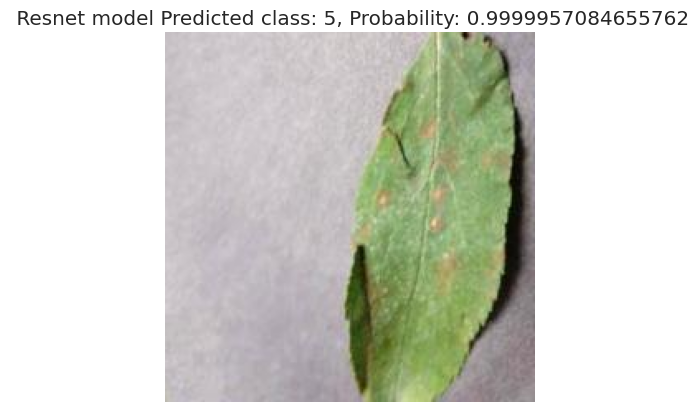

1/1 [==============================] - 0s 354ms/step


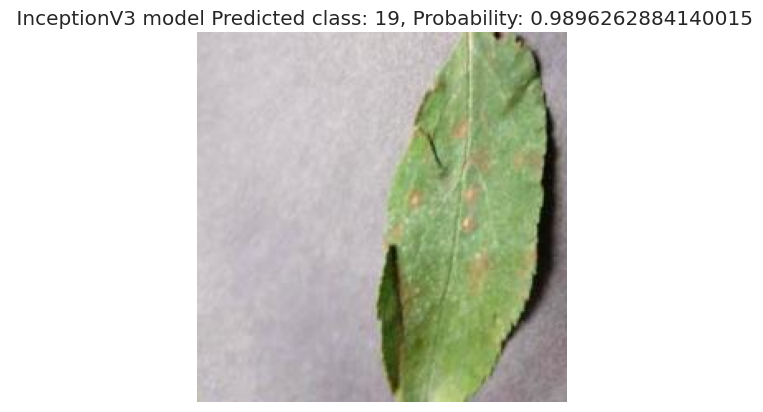

1/1 [==============================] - 1s 999ms/step


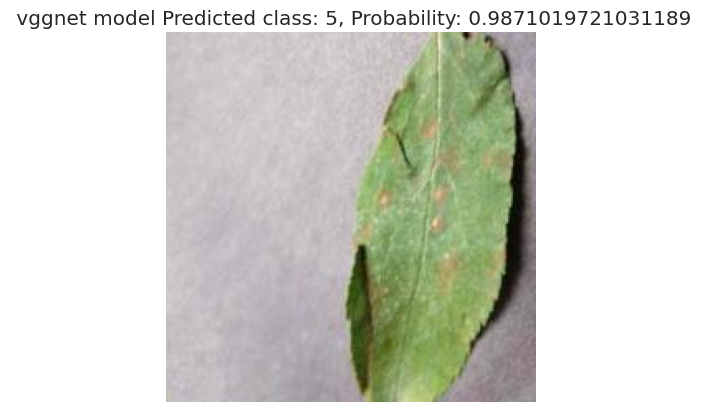

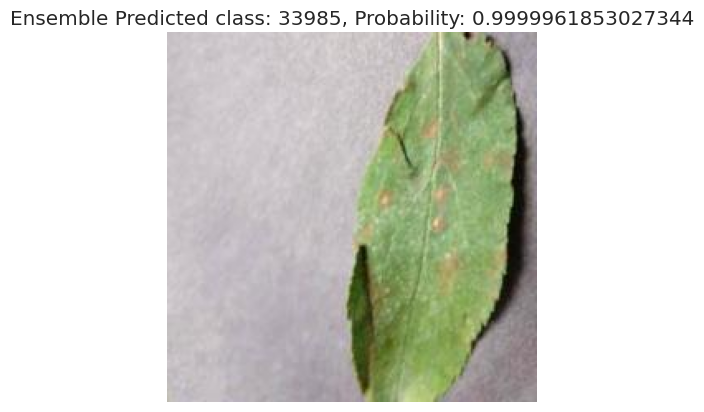

In [ ]:
#------------------------------------------->>>>>>>Pridict Image class<<<<<<<<<<----------------------------#
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data/Apple Cedar apple rust/aug_114_2061.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions using the ResNet model
predictions_resnet = model_1_RESNET50.predict(img_array)
predicted_resnet = np.argmax(predictions_resnet)
predicted_prob_resnet = np.max(predictions_resnet)

plt.imshow(img)
plt.title(f" Resnet model Predicted class: {predicted_resnet}, Probability: {predicted_prob_resnet}")
plt.axis('off')
plt.show()

# Make predictions using the InceptionV3 model
predictions_InceptionV3 = Inception_model.predict(img_array)
predicted_InceptionV3 = np.argmax(predictions_InceptionV3)
predicted_prob_InceptionV3 = np.max(predictions_InceptionV3)

plt.imshow(img)
plt.title(f" InceptionV3 model Predicted class: {predicted_InceptionV3}, Probability: {predicted_prob_InceptionV3}")
plt.axis('off')
plt.show()

# Make predictions using the vggNet model
predictions_vggnet = Vggnet_model.predict(img_array)
predicted_vggnet = np.argmax(predictions_vggnet)
predicted_prob_vggnet = np.max(predictions_vggnet)

plt.imshow(img)
plt.title(f" vggnet model Predicted class: {predicted_resnet}, Probability: {predicted_prob_vggnet}")
plt.axis('off')
plt.show()


 # Convert probabilities to class labels by taking argmax
resnet_class_labels = np.argmax(resnet_predictions, axis=1)
InceptionV3_class_labels = np.argmax(InceptionV3_predictions, axis=1)
vggnet_class_labels = np.argmax(Vggnet_predictions, axis=1)
ensemble_class_labels = np.argmax(ensemble_predictions, axis=1)

# Visualize an image prediction using ensemble model
img_array = preprocess_input(img_array)  # Preprocess the image array if needed
predicted_ensemble = np.argmax(ensemble_predictions)
predicted_prob_ensemble = np.max(ensemble_predictions)

plt.imshow(img)
plt.title(f"Ensemble Predicted class: {predicted_ensemble}, Probability: {predicted_prob_ensemble}")
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 1s/step


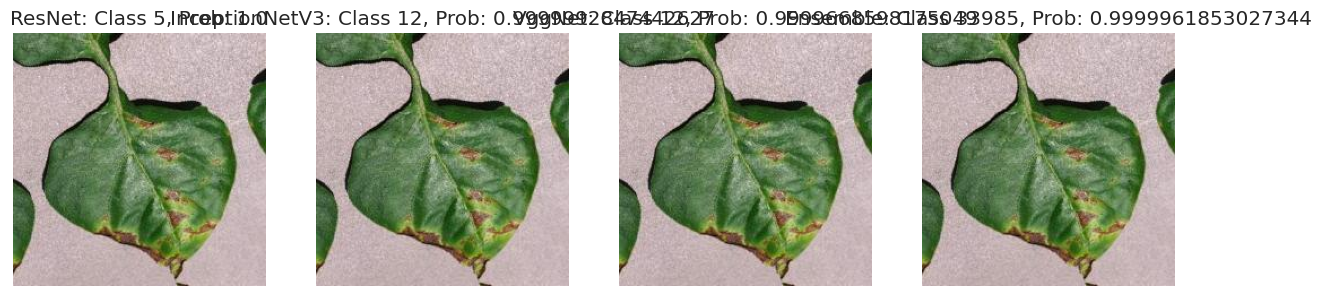

In [ ]:
 # Load the image
img_path = '/content/drive/MyDrive/ VIT_MT_PROJECT__2/ DATASET/Test_data/Bell Pepper Bacterial spot/aug_392_4505.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions using the ResNet model
predictions_resnet = model_1_RESNET50.predict(img_array)
predicted_resnet = np.argmax(predictions_resnet)
predicted_prob_resnet = np.max(predictions_resnet)

# Make predictions using the InceptionV3 model
predictions_InceptionV3 = Inception_model.predict(img_array)
predicted_InceptionV3 = np.argmax(predictions_InceptionV3)
predicted_prob_InceptionV3 = np.max(predictions_InceptionV3)

# Make predictions using the VGGNet model
predictions_vggnet = Vggnet_model.predict(img_array)
predicted_vggnet = np.argmax(predictions_vggnet)
predicted_prob_vggnet = np.max(predictions_vggnet)


# Make predictions using the ensemble model
predictions_ensemble = ensemble_predictions
predicted_ensemble = np.argmax(predictions_ensemble)
predicted_prob_ensemble = np.max(predictions_ensemble)

# Plot the images and predictions in one row
plt.figure(figsize=(15, 5))

# ResNet prediction
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title(f"ResNet: Class {predicted_resnet}, Prob: {predicted_prob_resnet}")
plt.axis('off')

# InceptionV3 prediction
plt.subplot(1, 4, 2)
plt.imshow(img)
plt.title(f"InceptionNetV3: Class {predicted_InceptionV3}, Prob: {predicted_prob_InceptionV3}")
plt.axis('off')

# VggNet prediction
plt.subplot(1, 4, 3)
plt.imshow(img)
plt.title(f"VggNet: Class {predicted_vggnet}, Prob: {predicted_prob_vggnet}")
plt.axis('off')

# Ensemble prediction
plt.subplot(1, 4, 4)
plt.imshow(img)
plt.title(f"Ensemble: Class {predicted_ensemble}, Prob: {predicted_prob_ensemble}")
plt.axis('off')

plt.show()


#**Ensemble learning using stacking**#

In [ ]:
# Convert probabilities to class labels by taking argmax

from sklearn.model_selection import train_test_split

resnet_class_labels = np.argmax(resnet_predictions, axis=1)
InceptionV3_class_labels = np.argmax(InceptionV3_predictions, axis=1)
vggnet_class_labels = np.argmax(Vggnet_predictions, axis=1)

# Combine predictions as features for meta-learner
X_meta = np.column_stack((resnet_predictions, InceptionV3_predictions,Vggnet_predictions))

# Split data into training and testing sets for the meta-learner
X_train, X_test, y_train, y_test = train_test_split(X_meta, true_labels, test_size=0.2, random_state=42)

In [ ]:
# Train a meta-learner (Random Forest in this case)
from sklearn.ensemble import RandomForestClassifier
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)
meta_learner.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions using the meta-learner
meta_predictions = meta_learner.predict(X_test)

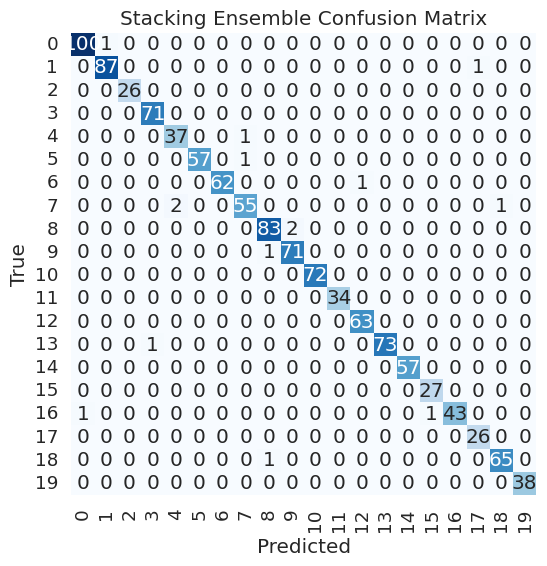

In [ ]:
# Calculate confusion matrix
meta_cm = confusion_matrix(y_test, meta_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(meta_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Stacking Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculate classification report
meta_report = classification_report(y_test, meta_predictions)
print("Stacking Ensemble Classification Report:")
print(meta_report)

Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.99      0.99      0.99        88
           2       1.00      1.00      1.00        26
           3       0.99      1.00      0.99        71
           4       0.95      0.97      0.96        38
           5       1.00      0.98      0.99        58
           6       1.00      0.98      0.99        63
           7       0.96      0.95      0.96        58
           8       0.98      0.98      0.98        85
           9       0.97      0.99      0.98        72
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        34
          12       0.98      1.00      0.99        63
          13       1.00      0.99      0.99        74
          14       1.00      1.00      1.00        57
          15       0.96      1.00      0.98        27
          16       1.00      0.96      0

In [ ]:
# Calculate accuracy
meta_accuracy = accuracy_score(y_test, meta_predictions)
print("\nStacking Ensemble Accuracy:", meta_accuracy)


Stacking Ensemble Accuracy: 0.9870912220309811


In [ ]:
# Calculate accuracy
meta_accuracy = accuracy_score(y_test, meta_predictions)
print("\nStacking Ensemble Accuracy: {:.2f}%".format( meta_accuracy * 100))


Stacking Ensemble Accuracy: 98.71%


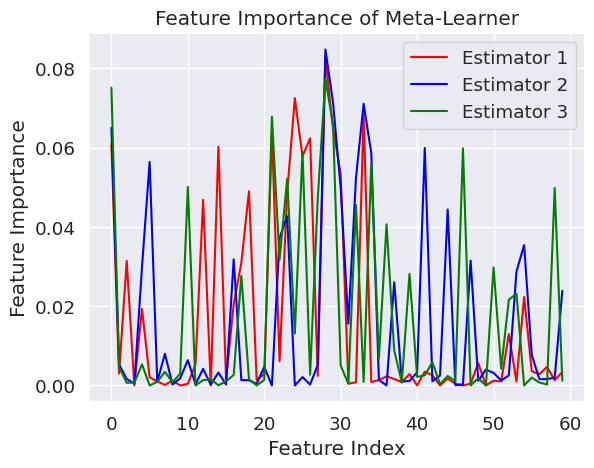

In [ ]:

# Plot training graph
plt.plot(meta_learner.estimators_[0].feature_importances_, color='red', label='Estimator 1')
plt.plot(meta_learner.estimators_[1].feature_importances_, color='blue', label='Estimator 2')
plt.plot(meta_learner.estimators_[2].feature_importances_, color='green', label='Estimator 3')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Meta-Learner')
plt.legend()
plt.show()


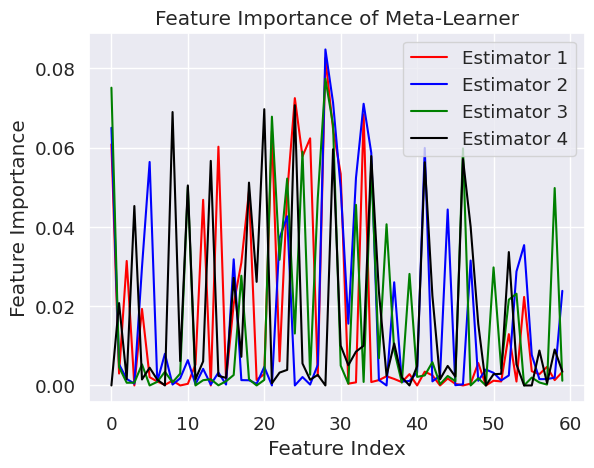

In [ ]:

# Plot training graph
plt.plot(meta_learner.estimators_[0].feature_importances_, color='red', label='Estimator 1')
plt.plot(meta_learner.estimators_[1].feature_importances_, color='blue', label='Estimator 2')
plt.plot(meta_learner.estimators_[2].feature_importances_, color='green', label='Estimator 3')
plt.plot(meta_learner.estimators_[3].feature_importances_, color='black', label='Estimator 4')

plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Meta-Learner')
plt.legend()
plt.show()
